In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#https://github.com/fraunhoferhhi/BerlinV2X
sidelink='./../../Data/BerlinV2X/sidelink_dataframe.parquet'
cellular='./../../Data/BerlinV2X/cellular_dataframe.parquet'
df = pd.read_parquet(cellular)
#df.info(verbose=True, show_counts=True)

In [3]:
df.head()

,device,ping_ms,datarate,jitter,ts_gps,Latitude,Longitude,Altitude,speed_kmh,COG,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,cloudCover,uvIndex,visibility,Traffic Jam Factor,Traffic Street Name,Traffic Distance,Pos in Ref Round,measurement,area,PCell_RSRP_1,PCell_RSRP_2,PCell_RSRP_max,PCell_RSRQ_1,PCell_RSRQ_2,PCell_RSRQ_max,PCell_RSSI_1,PCell_RSSI_2,PCell_RSSI_max,PCell_SNR_1,PCell_SNR_2,PCell_E-ARFCN,PCell_Downlink_Num_RBs,PCell_Downlink_TB_Size,PCell_Downlink_RBs_MCS_0,PCell_Downlink_RBs_MCS_1,PCell_Downlink_RBs_MCS_2,PCell_Downlink_RBs_MCS_3,PCell_Downlink_RBs_MCS_4,PCell_Downlink_RBs_MCS_5,PCell_Downlink_RBs_MCS_6,PCell_Downlink_RBs_MCS_7,PCell_Downlink_RBs_MCS_8,PCell_Downlink_RBs_MCS_9,PCell_Downlink_RBs_MCS_10,PCell_Downlink_RBs_MCS_11,PCell_Downlink_RBs_MCS_12,PCell_Downlink_RBs_MCS_13,PCell_Downlink_RBs_MCS_14,PCell_Downlink_RBs_MCS_15,PCell_Downlink_RBs_MCS_16,PCell_Downlink_RBs_MCS_17,PCell_Downlink_RBs_MCS_18,PCell_Downlink_RBs_MCS_19,PCell_Downlink_RBs_MCS_20,PCell_Downlink_RBs_MCS_21,PCell_Downlink_RBs_MCS_22,PCell_Downlink_RBs_MCS_23,PCell_Downlink_RBs_MCS_24,PCell_Downlink_RBs_MCS_25,PCell_Downlink_RBs_MCS_26,PCell_Downlink_RBs_MCS_27,PCell_Downlink_RBs_MCS_28,PCell_Downlink_RBs_MCS_29,PCell_Downlink_RBs_MCS_30,PCell_Downlink_RBs_MCS_31,PCell_Downlink_Average_MCS,PCell_Uplink_Num_RBs,PCell_Uplink_TB_Size,PCell_Uplink_Tx_Power_(dBm),PCell_Cell_ID,PCell_Downlink_frequency,PCell_Uplink_frequency,PCell_Downlink_bandwidth_MHz,PCell_Uplink_bandwidth_MHz,PCell_Cell_Identity,PCell_TAC,PCell_Band_Indicator,PCell_MCC,PCell_MNC_Digit,PCell_MNC,PCell_Allowed_Access,PCell_freq_MHz,SCell_RSRP_1,SCell_RSRP_2,SCell_RSRP_max,SCell_RSRQ_1,SCell_RSRQ_2,SCell_RSRQ_max,SCell_RSSI_1,SCell_RSSI_2,SCell_RSSI_max,SCell_SNR_1,SCell_SNR_2,SCell_E-ARFCN,SCell_Downlink_Num_RBs,SCell_Downlink_TB_Size,SCell_Downlink_RBs_MCS_0,SCell_Downlink_RBs_MCS_1,SCell_Downlink_RBs_MCS_2,SCell_Downlink_RBs_MCS_3,SCell_Downlink_RBs_MCS_4,SCell_Downlink_RBs_MCS_5,SCell_Downlink_RBs_MCS_6,SCell_Downlink_RBs_MCS_7,SCell_Downlink_RBs_MCS_8,SCell_Downlink_RBs_MCS_9,SCell_Downlink_RBs_MCS_10,SCell_Downlink_RBs_MCS_11,SCell_Downlink_RBs_MCS_12,SCell_Downlink_RBs_MCS_13,SCell_Downlink_RBs_MCS_14,SCell_Downlink_RBs_MCS_15,SCell_Downlink_RBs_MCS_16,SCell_Downlink_RBs_MCS_17,SCell_Downlink_RBs_MCS_18,SCell_Downlink_RBs_MCS_19,SCell_Downlink_RBs_MCS_20,SCell_Downlink_RBs_MCS_21,SCell_Downlink_RBs_MCS_22,SCell_Downlink_RBs_MCS_23,SCell_Downlink_RBs_MCS_24,SCell_Downlink_RBs_MCS_25,SCell_Downlink_RBs_MCS_26,SCell_Downlink_RBs_MCS_27,SCell_Downlink_RBs_MCS_28,SCell_Downlink_RBs_MCS_29,SCell_Downlink_RBs_MCS_30,SCell_Downlink_RBs_MCS_31,SCell_Downlink_Average_MCS,SCell_Uplink_Num_RBs,SCell_Uplink_TB_Size,SCell_Uplink_Tx_Power_(dBm),SCell_Cell_ID,SCell_Downlink_frequency,SCell_Uplink_frequency,SCell_Downlink_bandwidth_MHz,SCell_Uplink_bandwidth_MHz,SCell_Cell_Identity,SCell_TAC,SCell_Band_Indicator,SCell_MCC,SCell_MNC_Digit,SCell_MNC,SCell_Allowed_Access,SCell_freq_MHz,scenario,drive_mode,target_datarate,direction,measured_qos,operator
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-06-22 09:49:00+02:00,pc4,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,0,None,-83.476250,-85.292500,-83.476250,-14.799375,-14.771875,-14.573125,-48.676250,-50.520625,-50.520625,23.591,21.963,1300.0,39870.0,6433701.0,NaN,156.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,78.0,453.0,1452.5,4480.0,6442.5,12867.5,10880.0,NaN,NaN,3031.5,27.0,973.0,28004.0,120.854749,246.0,1300.0,19300.0,20,20,33802242.0,1494.0,3.0,262.0,2.0,1.0,0.0,1800.0,-84.980625,-86.231875,-84.930000,-10.736250,-9.635625,-9.614375,-54.243750,-56.594375,-56.594375,25.171,24.226,3050.0,46504.0,8422381.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
# Operator1 pc1 19564 entries, 2021-06-22 09:49:54+02:00 to 2021-06-24 18:59:59+02:00
#           pc4 9554 entries, 2021-06-22 09:49:54+02:00 to 2021-06-22 15:44:59+02:00
# Operator2 pc2 8779 entries, 2021-06-22 09:49:54+02:00 to 2021-06-22 18:13:59+02:00
#           pc3 14776 entries, 2021-06-22 09:49:54+02:00 to 2021-06-24 18:52:46+02:00
#filtered_data = filtered_data.query("device == 'pc1'").query("operator == 1")
#filtered_data = filtered_data.query("device == 'pc2'").query("operator == 2")
#filtered_data = filtered_data.query("device == 'pc3'").query("operator == 2")

In [5]:
filtered_data = df.dropna(subset='datarate')
filtered_data = filtered_data.query("measured_qos == 'datarate'")
#filtered_data = filtered_data[filtered_data.columns.drop(list(filtered_data.filter(regex='SCell')))]
filtered_data = filtered_data.drop(columns=[
    'ping_ms', 'Traffic Jam Factor', 'Traffic Street Name', 'Traffic Distance', 'measurement', 'area', 
    'scenario', 'drive_mode', 'measured_qos', 'jitter', 'ts_gps', 'precipIntensity', 'precipProbability', 
    'temperature', 'apparentTemperature', 'dewPoint', 'humidity', 'pressure', 'windSpeed', 'cloudCover', 'uvIndex', 
    'visibility', 'target_datarate', 'PCell_MCC', 'PCell_MNC_Digit', 'PCell_MNC', 'PCell_Allowed_Access'])

filtered_data['PCell_Downlink_bandwidth_MHz'] = pd.to_numeric(filtered_data['PCell_Downlink_bandwidth_MHz'])
filtered_data['PCell_Uplink_bandwidth_MHz'] = pd.to_numeric(filtered_data['PCell_Uplink_bandwidth_MHz'])

filtered_data_downlink = filtered_data.query("direction == 'downlink'").drop(columns=['direction'])
filtered_data_uplink = filtered_data.query("direction == 'uplink'").drop(columns=['direction'])

filtered_data_downlink.info(verbose=True, show_counts=True)
#filtered_data_downlink['datarate'].plot()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52673 entries, 2021-06-22 09:49:54+02:00 to 2021-06-24 18:59:59+02:00
Data columns (total 131 columns):
 #    Column                        Non-Null Count  Dtype  
---   ------                        --------------  -----  
 0    device                        52673 non-null  object 
 1    datarate                      52673 non-null  float64
 2    Latitude                      52553 non-null  float64
 3    Longitude                     52553 non-null  float64
 4    Altitude                      52541 non-null  float64
 5    speed_kmh                     52553 non-null  float64
 6    COG                           52553 non-null  float64
 7    Pos in Ref Round              49190 non-null  float64
 8    PCell_RSRP_1                  52637 non-null  float64
 9    PCell_RSRP_2                  52637 non-null  float64
 10   PCell_RSRP_max                52637 non-null  float64
 11   PCell_RSRQ_1                  52637 non-null  float64
 12

Reference Signal Received Quality (RSRQ) is defined as the ratio N×RSRP/(E-UTRA carrier RSSI), 
where N is the number of RB’s of the E-UTRA carrier RSSI measurement bandwidth. The measurements 
in the numerator and denominator shall be made over the same set of resource blocks. 

RSRQ = (Nrb x RSRP) / (RSSI)
Nrb = (RSRQ * RSSI) / RSRP

In [6]:
#df_RBs = filtered_data_downlink[['PCell_RSRQ_1', 'PCell_RSSI_1', 'PCell_RSRP_1', 'PCell_Downlink_Num_RBs']]

In [7]:
#df_RBs['calculated_num_RBs'] = (df_RBs['PCell_RSRQ_1'] * df_RBs['PCell_RSSI_1']) / (df_RBs['PCell_RSRP_1'])
#df_RBs.head()

In [8]:
filtered_data_downlink_pc1_op1 = filtered_data_downlink.query("device == 'pc1'").query("operator == 1")
filtered_data_downlink_pc4_op1 = filtered_data_downlink.query("device == 'pc4'").query("operator == 1")
filtered_data_downlink_pc2_op2 = filtered_data_downlink.query("device == 'pc2'").query("operator == 2")
filtered_data_downlink_pc3_op2 = filtered_data_downlink.query("device == 'pc3'").query("operator == 2")

In [9]:
concat_filtered_data_downlink = pd.concat([filtered_data_downlink_pc1_op1, filtered_data_downlink_pc4_op1, filtered_data_downlink_pc2_op2, filtered_data_downlink_pc3_op2])
#concat_filtered_data_downlink.info(verbose=True, show_counts=True)
filtered_data_downlink = concat_filtered_data_downlink
df_plot = concat_filtered_data_downlink
df_plot.reset_index(drop=True, inplace=True)

In [10]:
# Calculate mean and standard deviation
mean_value = df_plot['datarate'].div(1024*1024).mean()
std_value = df_plot['datarate'].div(1024*1024).std()

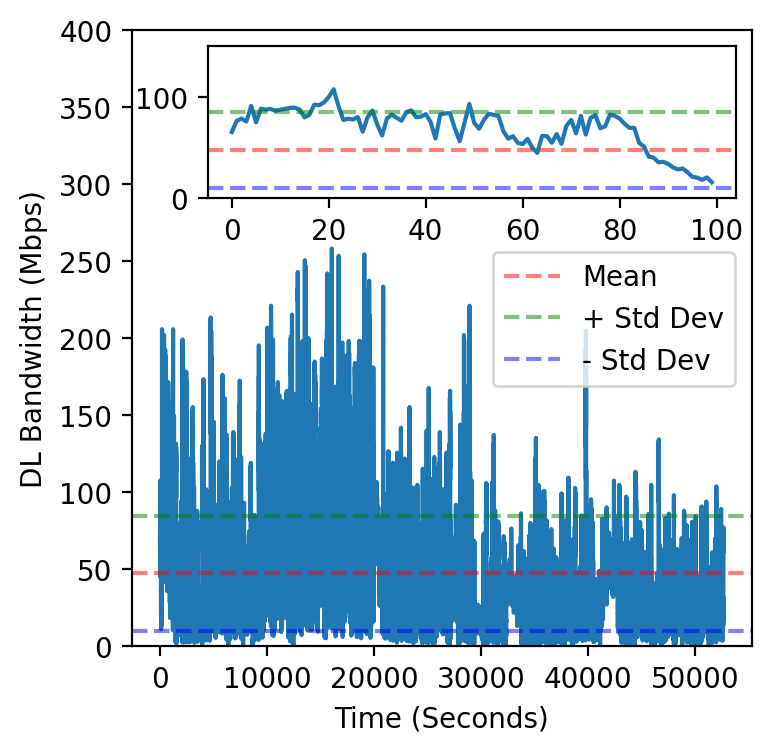

In [11]:
figure_size = (4, 4)
fig, ax1 = plt.subplots(figsize=figure_size, dpi=200)
ax1.set_xlabel('Time (Seconds)')
ax1.set_ylabel('DL Bandwidth (Mbps)')
ax1.set_ylim(bottom=0, top=400)

left, bottom, width, height = [0.22, 0.67, 0.66, 0.19]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.set_ylim(bottom=0, top=150)

ax1.plot(df_plot['datarate'].div(1024*1024))

alpha_val = 0.5
# Plot mean and standard deviation lines on ax1
ax1.axhline(mean_value, color='r', linestyle='--', alpha=alpha_val, label='Mean')
ax1.axhline(mean_value + std_value, color='g', linestyle='--', alpha=alpha_val, label='+ Std Dev')
ax1.axhline(mean_value - std_value, color='b', linestyle='--', alpha=alpha_val, label='- Std Dev')

# Add legend
ax1.legend(loc='lower left', bbox_to_anchor=(0.56, 0.4))

ax2.plot(df_plot['datarate'].div(1024*1024)[:100])
# Plot mean and standard deviation lines on ax2
ax2.axhline(mean_value, color='r', linestyle='--', alpha=alpha_val, label='Mean')
ax2.axhline(mean_value + std_value, color='g', linestyle='--', alpha=alpha_val, label='+ Std Dev')
ax2.axhline(mean_value - std_value, color='b', linestyle='--', alpha=alpha_val, label='- Std Dev')
fig.savefig(f'plots/BerlinV2X-data.pdf', bbox_inches='tight')

In [12]:
df_plot['datarate'].div(1024*1024).describe()

count    52673.000000
mean        47.458586
std         37.380467
min          0.000812
25%         21.171570
50%         37.193298
75%         60.844421
max        258.445740
Name: datarate, dtype: float64

In [13]:
""" filtered_data_downlink['shifted'] = filtered_data_downlink['datarate'].shift(1, fill_value=0)
filtered_data_downlink['datarate-shifted'] = filtered_data_downlink['datarate'] - filtered_data_downlink['shifted'] # residual

filtered_data_downlink['ewma8'] = filtered_data_downlink['datarate'].ewm(span=8, adjust=True).mean()
filtered_data_downlink['ewma8_shifted'] = filtered_data_downlink['datarate'].ewm(span=8, adjust=True).mean().shift(1, fill_value=0)
filtered_data_downlink['datarate-ewma8_shifted'] = filtered_data_downlink['datarate'] - filtered_data_downlink['ewma8_shifted'] # residual
filtered_data_downlink.info(verbose=True, show_counts=True) """

" filtered_data_downlink['shifted'] = filtered_data_downlink['datarate'].shift(1, fill_value=0)\nfiltered_data_downlink['datarate-shifted'] = filtered_data_downlink['datarate'] - filtered_data_downlink['shifted'] # residual\n\nfiltered_data_downlink['ewma8'] = filtered_data_downlink['datarate'].ewm(span=8, adjust=True).mean()\nfiltered_data_downlink['ewma8_shifted'] = filtered_data_downlink['datarate'].ewm(span=8, adjust=True).mean().shift(1, fill_value=0)\nfiltered_data_downlink['datarate-ewma8_shifted'] = filtered_data_downlink['datarate'] - filtered_data_downlink['ewma8_shifted'] # residual\nfiltered_data_downlink.info(verbose=True, show_counts=True) "

In [14]:
filtered_data_downlink.head()

,device,datarate,Latitude,Longitude,Altitude,speed_kmh,COG,Pos in Ref Round,PCell_RSRP_1,PCell_RSRP_2,PCell_RSRP_max,PCell_RSRQ_1,PCell_RSRQ_2,PCell_RSRQ_max,PCell_RSSI_1,PCell_RSSI_2,PCell_RSSI_max,PCell_SNR_1,PCell_SNR_2,PCell_E-ARFCN,PCell_Downlink_Num_RBs,PCell_Downlink_TB_Size,PCell_Downlink_RBs_MCS_0,PCell_Downlink_RBs_MCS_1,PCell_Downlink_RBs_MCS_2,PCell_Downlink_RBs_MCS_3,PCell_Downlink_RBs_MCS_4,PCell_Downlink_RBs_MCS_5,PCell_Downlink_RBs_MCS_6,PCell_Downlink_RBs_MCS_7,PCell_Downlink_RBs_MCS_8,PCell_Downlink_RBs_MCS_9,PCell_Downlink_RBs_MCS_10,PCell_Downlink_RBs_MCS_11,PCell_Downlink_RBs_MCS_12,PCell_Downlink_RBs_MCS_13,PCell_Downlink_RBs_MCS_14,PCell_Downlink_RBs_MCS_15,PCell_Downlink_RBs_MCS_16,PCell_Downlink_RBs_MCS_17,PCell_Downlink_RBs_MCS_18,PCell_Downlink_RBs_MCS_19,PCell_Downlink_RBs_MCS_20,PCell_Downlink_RBs_MCS_21,PCell_Downlink_RBs_MCS_22,PCell_Downlink_RBs_MCS_23,PCell_Downlink_RBs_MCS_24,PCell_Downlink_RBs_MCS_25,PCell_Downlink_RBs_MCS_26,PCell_Downlink_RBs_MCS_27,PCell_Downlink_RBs_MCS_28,PCell_Downlink_RBs_MCS_29,PCell_Downlink_RBs_MCS_30,PCell_Downlink_RBs_MCS_31,PCell_Downlink_Average_MCS,PCell_Uplink_Num_RBs,PCell_Uplink_TB_Size,PCell_Uplink_Tx_Power_(dBm),PCell_Cell_ID,PCell_Downlink_frequency,PCell_Uplink_frequency,PCell_Downlink_bandwidth_MHz,PCell_Uplink_bandwidth_MHz,PCell_Cell_Identity,PCell_TAC,PCell_Band_Indicator,PCell_freq_MHz,SCell_RSRP_1,SCell_RSRP_2,SCell_RSRP_max,SCell_RSRQ_1,SCell_RSRQ_2,SCell_RSRQ_max,SCell_RSSI_1,SCell_RSSI_2,SCell_RSSI_max,SCell_SNR_1,SCell_SNR_2,SCell_E-ARFCN,SCell_Downlink_Num_RBs,SCell_Downlink_TB_Size,SCell_Downlink_RBs_MCS_0,SCell_Downlink_RBs_MCS_1,SCell_Downlink_RBs_MCS_2,SCell_Downlink_RBs_MCS_3,SCell_Downlink_RBs_MCS_4,SCell_Downlink_RBs_MCS_5,SCell_Downlink_RBs_MCS_6,SCell_Downlink_RBs_MCS_7,SCell_Downlink_RBs_MCS_8,SCell_Downlink_RBs_MCS_9,SCell_Downlink_RBs_MCS_10,SCell_Downlink_RBs_MCS_11,SCell_Downlink_RBs_MCS_12,SCell_Downlink_RBs_MCS_13,SCell_Downlink_RBs_MCS_14,SCell_Downlink_RBs_MCS_15,SCell_Downlink_RBs_MCS_16,SCell_Downlink_RBs_MCS_17,SCell_Downlink_RBs_MCS_18,SCell_Downlink_RBs_MCS_19,SCell_Downlink_RBs_MCS_20,SCell_Downlink_RBs_MCS_21,SCell_Downlink_RBs_MCS_22,SCell_Downlink_RBs_MCS_23,SCell_Downlink_RBs_MCS_24,SCell_Downlink_RBs_MCS_25,SCell_Downlink_RBs_MCS_26,SCell_Downlink_RBs_MCS_27,SCell_Downlink_RBs_MCS_28,SCell_Downlink_RBs_MCS_29,SCell_Downlink_RBs_MCS_30,SCell_Downlink_RBs_MCS_31,SCell_Downlink_Average_MCS,SCell_Uplink_Num_RBs,SCell_Uplink_TB_Size,SCell_Uplink_Tx_Power_(dBm),SCell_Cell_ID,SCell_Downlink_frequency,SCell_Uplink_frequency,SCell_Downlink_bandwidth_MHz,SCell_Uplink_bandwidth_MHz,SCell_Cell_Identity,SCell_TAC,SCell_Band_Indicator,SCell_MCC,SCell_MNC_Digit,SCell_MNC,SCell_Allowed_Access,SCell_freq_MHz,operator
0,pc1,68700000.0,52.514013,13.335172,41.9,0.0,0.0,NaN,-76.638750,-79.811875,-76.638750,-14.459375,-14.248750,-14.119375,-42.186875,-45.562500,-45.562500,19.255,22.090,1300.0,29914.0,4381967.0,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.0,392.0,1475.0,2287.0,3245.5,1461.0,3801.0,6476.0,4757.5,4120.0,NaN,NaN,1803.0,26.0,429.0,2267.0,111.224691,246.0,1300.0,19300.0,20.0,20.0,33802242.0,1494.0,3.0,1800.0,-84.699375,-73.418750,-73.418750,-9.640625,-10.627500,-9.631250,-55.057500,-42.787500,-42.787500,21.968,26.189,3050.0,46392.0,6111069.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,376.0,3703.0,21673.0,13544.0,1524.0,3174.0,NaN,NaN,NaN,NaN,2398.0,24.0,NaN,NaN,NaN,431.0,3050.0,21050.0,20,20,33802248.0,1494.0,7.0,262.0,2.0,1.0,0.0,2600.0,1
1,pc1,80300000.0,52.514012,13.335173,41.9,0.0,0.0,NaN,-77.602500,-79.874375,-77.602500,-15.041875,-14.629375,-14.550000,-42.562500,-45.241250,-45.241250,17.914,22.183,1300.0,36796.0,5085821.0,NaN,44.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.0,196.0,642.0,1197.0,2699.0,2735.5,2308.0,2648.5,2515.0,3534.5,5898.0,5727.5,2974.5,NaN,50.0,3539.5,25.0,449.0,2267.0,109.516432,246.0,1300.0,19300.0,20.0,20.0

In [15]:
#filtered_data_downlink.describe(include='all')

In [16]:
#filtered_data_downlink['datarate'].describe(include='all')

In [17]:
# Bandformer old selected features
filtered_data_downlink_selected_old = filtered_data_downlink[[
    'datarate',  # 'shifted', 'datarate-shifted',
    # 'ewma8', 'ewma8_shifted', 'datarate-ewma8_shifted',
    'PCell_Downlink_TB_Size', 'SCell_Downlink_TB_Size', 
    'PCell_SNR_1', 'PCell_SNR_2', 'SCell_SNR_1', 'SCell_SNR_2', 
    'PCell_RSSI_1', 'PCell_RSSI_2', 'PCell_RSSI_max',  
    'PCell_RSRP_1', 'PCell_RSRP_2', 'PCell_RSRP_max',
    'PCell_Downlink_Average_MCS', 'SCell_Downlink_Average_MCS', 
    'PCell_Downlink_Num_RBs', 'SCell_Downlink_Num_RBs']]

""" filtered_data_downlink_pc1_op1_selected_old = filtered_data_downlink_pc1_op1[[
    'datarate', 
    'PCell_Downlink_TB_Size', 'SCell_Downlink_TB_Size', 
    'PCell_SNR_1', 'PCell_SNR_2', 'SCell_SNR_1', 'SCell_SNR_2', 
    'PCell_RSSI_1', 'PCell_RSSI_2', 'PCell_RSSI_max',  
    'PCell_RSRP_1', 'PCell_RSRP_2', 'PCell_RSRP_max',
    'PCell_Downlink_Average_MCS', 'SCell_Downlink_Average_MCS', 
    'PCell_Downlink_Num_RBs', 'SCell_Downlink_Num_RBs']]

filtered_data_downlink_selected_new = filtered_data_downlink[[
    'datarate', 
    'PCell_Downlink_TB_Size', 
    'PCell_SNR_1', 'PCell_SNR_2',
    'PCell_Downlink_Average_MCS',
    'PCell_RSSI_1', 'PCell_RSSI_2', 'PCell_RSSI_max',  
    'PCell_RSRP_1', 'PCell_RSRP_2', 'PCell_RSRP_max',
    'PCell_Downlink_Num_RBs',
    'PCell_RSRQ_1', 'PCell_RSRQ_2', 'PCell_RSRQ_max'
    ]] """
filtered_data_downlink_selected_old.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52673 entries, 0 to 52672
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   datarate                    52673 non-null  float64
 1   PCell_Downlink_TB_Size      52647 non-null  float64
 2   SCell_Downlink_TB_Size      27231 non-null  float64
 3   PCell_SNR_1                 52637 non-null  float64
 4   PCell_SNR_2                 52637 non-null  float64
 5   SCell_SNR_1                 28657 non-null  float64
 6   SCell_SNR_2                 28657 non-null  float64
 7   PCell_RSSI_1                52637 non-null  float64
 8   PCell_RSSI_2                52637 non-null  float64
 9   PCell_RSSI_max              52637 non-null  float64
 10  PCell_RSRP_1                52637 non-null  float64
 11  PCell_RSRP_2                52637 non-null  float64
 12  PCell_RSRP_max              52637 non-null  float64
 13  PCell_Downlink_Average_MCS  526

In [18]:
filtered_data_downlink_selected_old['date'] = filtered_data_downlink_selected_old.index
filtered_data_downlink_selected_old = filtered_data_downlink_selected_old.ffill(limit=5)
filtered_data_downlink_selected_old = filtered_data_downlink_selected_old.fillna(0)
#filtered_data_downlink.info(verbose=True, show_counts=True)

/tmp/ipykernel_2107269/3576426184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_downlink_selected_old['date'] = filtered_data_downlink_selected_old.index


In [19]:
#filtered_data_downlink_pc1_op1['date'] = filtered_data_downlink_pc1_op1.index
#filtered_data_downlink_pc1_op1 = filtered_data_downlink_pc1_op1.ffill(limit=5)
#filtered_data_downlink_pc1_op1 = filtered_data_downlink_pc1_op1.fillna(0)
#filtered_data_downlink.info(verbose=True, show_counts=True)

In [20]:
#filtered_data_downlink = filtered_data_downlink[filtered_data_downlink.columns.drop(list(filtered_data_downlink.filter(regex='PCell_Downlink_RBs_MCS_')))]
#filtered_data_downlink.to_csv('./data/BERLINV2X/filtered_data_downlink.csv', encoding='utf-8', index=False)
#filtered_data_downlink.info(verbose=True, show_counts=True)

In [21]:
#filtered_data_downlink_pc1_op1 = filtered_data_downlink_pc1_op1[filtered_data_downlink_pc1_op1.columns.drop(list(filtered_data_downlink_pc1_op1.filter(regex='PCell_Downlink_RBs_MCS_')))]
#filtered_data_downlink_pc1_op1.to_csv('./data/BERLINV2X/filtered_data_downlink_pc1_op1.csv', encoding='utf-8', index=False)
#filtered_data_downlink.info(verbose=True, show_counts=True)

In [22]:
filtered_data_downlink_selected_old.describe()

,datarate,PCell_Downlink_TB_Size,SCell_Downlink_TB_Size,PCell_SNR_1,PCell_SNR_2,SCell_SNR_1,SCell_SNR_2,PCell_RSSI_1,PCell_RSSI_2,PCell_RSSI_max,PCell_RSRP_1,PCell_RSRP_2,PCell_RSRP_max,PCell_Downlink_Average_MCS,SCell_Downlink_Average_MCS,PCell_Downlink_Num_RBs,SCell_Downlink_Num_RBs,date
count,5.267300e+04,5.267300e+04,5.267300e+04,52673.000000,52673.000000,52673.000000,52673.000000,52673.000000,52673.000000,52673.000000,52673.000000,52673.000000,52673.000000,52673.000000,52673.000000,52673.000000,52673.000000,52673.000000
mean,4.976393e+07,4.524627e+06,2.617516e+06,10.744335,9.072081,5.986271,5.508088,-56.041132,-60.308330,-60.308330,-89.687946,-94.608625,-88.819027,19.865225,9.900537,61590.498567,35126.498358,26336.000000
std,3.919626e+07,3.011763e+06,3.502870e+06,7.529651,8.938396,8.083984,8.363758,10.959077,15.602209,15.602209,11.737896,17.766489,11.905223,5.321538,9.807939,23607.251834,37313.230915,15205.529701
min,8.510000e+02,0.000000e+00,0.000000e+00,-15.603000,-16.289899,-17.950000,-18.250000,-92.683333,-96.388462,-96.388462,-174.689375,-175.605625,-175.605625,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.220000e+07,2.405036e+06,0.000000e+00,5.446000,3.602000,0.000000,0.000000,-63.305000,-67.619375,-67.619375,-97.376250,-101.821875,-96.683750,16.000000,0.000000,42202.000000,0.000000,13168.000000
50%,3.900000e+07,3.824019e+06,1.022330e+06,10.949000,9.715842,1.845000,0.000000,-55.931875,-57.961250,-57.961250,-89.764375,-92.017500,-88.893125,20.000000,11.000000,54024.000000,32668.000000,26336.000000
75%,6.380000e+07,5.869808e+06,4.113265e+06,16.390000,15.810000,12.867000,12.918000,-48.853125,-49.593125,-49.593125,-82.306250,-83.096250,-81.147500,24.000000,19.000000,86657.000000,71072.000000,39504.000000
max,2.710000e+08,1.867910e+07,1.843587e+07,28.958000,28.564000,28.478000,28.404000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,31.000000,100580.000000,99516.000000,52672.000000


In [23]:
filtered_data_downlink_selected_old.info(verbose=True, show_counts=True)
filtered_data_downlink_selected_old.to_csv('./data/BERLINV2X/concat_filtered_data_downlink_old_features.csv', encoding='utf-8', index=False)
filtered_data_downlink_selected_old.to_csv('./../../Data/BerlinV2X-preprocessed/concat_filtered_data_downlink_old_features.csv', encoding='utf-8', index=False)

#filtered_data_downlink_pc1_op1_selected_old.info(verbose=True, show_counts=True)
#filtered_data_downlink_pc1_op1_selected_old.to_csv('./data/BERLINV2X/filtered_data_downlink_pc1_op1_selected_old.csv', encoding='utf-8', index=False)
#filtered_data_downlink_pc1_op1_selected_old.to_csv('./../../Data/BerlinV2X-preprocessed/filtered_data_downlink_pc1_op1_selected_old.csv', encoding='utf-8', index=False)

#filtered_data_downlink_selected_new.info(verbose=True, show_counts=True)
#filtered_data_downlink_selected_new.to_csv('./data/BERLINV2X/concat_filtered_data_downlink.csv', encoding='utf-8', index=False)
#filtered_data_downlink_selected_new.to_csv('./../../Data/BerlinV2X-preprocessed/concat_filtered_data_downlink.csv', encoding='utf-8', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52673 entries, 0 to 52672
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   datarate                    52673 non-null  float64
 1   PCell_Downlink_TB_Size      52673 non-null  float64
 2   SCell_Downlink_TB_Size      52673 non-null  float64
 3   PCell_SNR_1                 52673 non-null  float64
 4   PCell_SNR_2                 52673 non-null  float64
 5   SCell_SNR_1                 52673 non-null  float64
 6   SCell_SNR_2                 52673 non-null  float64
 7   PCell_RSSI_1                52673 non-null  float64
 8   PCell_RSSI_2                52673 non-null  float64
 9   PCell_RSSI_max              52673 non-null  float64
 10  PCell_RSRP_1                52673 non-null  float64
 11  PCell_RSRP_2                52673 non-null  float64
 12  PCell_RSRP_max              52673 non-null  float64
 13  PCell_Downlink_Average_MCS  526

In [24]:
filtered_data_downlink_selected_old.head()

,datarate,PCell_Downlink_TB_Size,SCell_Downlink_TB_Size,PCell_SNR_1,PCell_SNR_2,SCell_SNR_1,SCell_SNR_2,PCell_RSSI_1,PCell_RSSI_2,PCell_RSSI_max,PCell_RSRP_1,PCell_RSRP_2,PCell_RSRP_max,PCell_Downlink_Average_MCS,SCell_Downlink_Average_MCS,PCell_Downlink_Num_RBs,SCell_Downlink_Num_RBs,date
0,68700000.0,4381967.0,6111069.0,19.255,22.090,21.968,26.189,-42.186875,-45.562500,-45.562500,-76.638750,-79.811875,-76.638750,26.0,24.0,29914.0,46392.0,0
1,80300000.0,5085821.0,7083430.0,17.914,22.183,22.368,26.416,-42.562500,-45.241250,-45.241250,-77.602500,-79.874375,-77.602500,25.0,25.0,36796.0,48460.0,1
2,82600000.0,3651540.0,7045455.0,17.939,22.364,22.495,26.046,-42.579375,-45.315625,-45.315625,-77.634375,-80.081875,-77.634375,24.0,27.0,27210.0,43548.0,2
3,79600000.0,6077291.0,7226349.0,19.029,22.223,22.936,26.435,-41.573125,-45.401875,-45.401875,-76.256875,-79.810000,-76.256875,26.0,26.0,41625.0,48608.0,3
4,95700000.0,5670015.0,6526884.0,19.359,22.872,23.189,26.118,-41.448750,-45.606250,-45.606250,-76.021875,-79.693750,-76.021875,25.0,25.0,40278.0,46538.0,4


In [102]:
netem_df = filtered_data_downlink_selected_old[['date', 'datarate']].head(100)

netem_df['time_since_start'] = netem_df['date'] - netem_df['date'].min()
netem_df['time_since_start_seconds'] = netem_df['time_since_start'].dt.total_seconds()
netem_df['time'] = netem_df['time_since_start_seconds'].astype(int)
netem_df['datarate'] = netem_df['datarate'].astype(int)
netem_df = netem_df[['time', 'datarate']]
netem_df.to_csv('./../../Data/BerlinV2X-preprocessed/time-bandwidth.csv', encoding='utf-8', index=False)
netem_df.to_parquet('./../../Data/BerlinV2X-preprocessed/time-bandwidth.parquet.gzip', compression='gzip')
netem_df.head()

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
netem_df.info()

In [ ]:
filtered_data_downlink_selected_old['datarate'].describe(include='all')

In [ ]:
filtered_data_downlink_selected_new['datarate'].describe(include='all')

In [ ]:
#filtered_data_downlink['datarate'].plot()

In [ ]:
#filtered_data_downlink['PCell_Downlink_TB_Size'].plot()

In [ ]:
#filtered_data_uplink.info(verbose=True, show_counts=True)

In [ ]:
#filtered_data_uplink.head()

In [ ]:
#filtered_data_uplink['datarate'].plot()

In [ ]:
df_ping = df.dropna(subset='ping_ms')
df_ping.info(verbose=True)

In [ ]:
df_ping.head()

In [ ]:
DIRECTION_downlink = True
# "direction == 'downlink'
# "direction == 'uplink'
# measured_qos == 'datarate'
# measured_qos == 'delay'
# Filter only for downlink datarate measurements
filtered_data = df.query("direction == 'downlink' & measured_qos == 'datarate'")

# Remove incomplete measurements without datarate
filtered_data = filtered_data.dropna(subset='datarate')

# Train and test split along operators
operator_1 = filtered_data.query("operator == 1")
operator_1_pc_1 = operator_1.query("device == 'pc1'")
operator_1_pc_2 = operator_1.query("device == 'pc2'")
operator_1_pc_3 = operator_1.query("device == 'pc3'")
operator_1_pc_4 = operator_1.query("device == 'pc4'")

print(len(operator_1_pc_1))
print(len(operator_1_pc_2))
print(len(operator_1_pc_3))
print(len(operator_1_pc_4))

operator_2 = filtered_data.query("operator == 2")
operator_2_pc_1 = operator_2.query("device == 'pc1'")
operator_2_pc_2 = operator_2.query("device == 'pc2'")
operator_2_pc_3 = operator_2.query("device == 'pc3'")
operator_2_pc_4 = operator_2.query("device == 'pc4'")

print(len(operator_2_pc_1))
print(len(operator_2_pc_2))
print(len(operator_2_pc_3))
print(len(operator_2_pc_4))

In [ ]:
df_new = operator_1_pc_1[['datarate', 'Latitude', 'Longitude', 'speed_kmh', 'PCell_RSSI_1', 'PCell_RSSI_2', 'PCell_RSRP_1', 'PCell_RSRP_2', 'PCell_RSRQ_1', 'PCell_RSRQ_2', 'PCell_SNR_1', 'PCell_SNR_2', 'PCell_Cell_ID', 'PCell_Downlink_frequency', 'PCell_Uplink_frequency', 'PCell_Downlink_bandwidth_MHz', 'PCell_Uplink_bandwidth_MHz', 'PCell_Cell_Identity', 'operator']]
#df_new = operator_2_pc_2[['datarate', 'SCell_RSRP_1','SCell_RSRP_2','SCell_RSRQ_1','SCell_RSRQ_2','SCell_RSSI_1','SCell_RSSI_2','SCell_SNR_1','SCell_SNR_2']]
df_new = df_new.dropna()
df_new.info()

In [ ]:
df_new.head()

In [ ]:
df_new.index.day_of_year

In [ ]:
df_new['second'] = df_new.index.second
df_new['minute'] = df_new.index.minute
df_new['hour'] = df_new.index.hour
df_new['day'] = df_new.index.day
#df_new['month'] = df_new.index.month
#df_new['dayofyear'] = df_new.index.day_of_year
df_new.head(10)

In [ ]:
df_new[['datarate']].plot(figsize=(9,6))

In [ ]:
df_new['datetime'] = df_new.index

groups=(df_new['datetime'].diff()>pd.Timedelta(seconds=1)).cumsum()+1
max_len = 0
continous_groups = []
for i , group in df_new.groupby(groups):
    if len(group) > 512:
        max_len = len(group)
        continous_groups.append(group)
        print(len(group))

#operator_1_pc_1, operator_1_pc_4, operator_2_pc_2, operator_2_pc_3

number = 0
for group in continous_groups:
    print(group.info())
    #group.to_parquet(f'/work/bde/Data/BerlinV2X-preprocessed/individual/group{number}.parquet.gzip',compression='gzip')
    group.to_csv(f'/work/bde/Data/BerlinV2X-preprocessed/individual/operator_1_pc_1-group{number}.csv', encoding='utf-8', index=False)
    number+=1

In [ ]:
SCOPE = 0
continous_groups[SCOPE][['datarate']].plot(figsize=(9,6))

In [ ]:
continous_groups[SCOPE][['PCell_RSRP_1', 'PCell_RSRQ_1', 'PCell_RSSI_1', 'PCell_SNR_1']].plot(figsize=(9,6))

In [ ]:
continous_groups[SCOPE][['PCell_RSRP_2', 'PCell_RSRQ_2', 'PCell_RSSI_2', 'PCell_SNR_2']].plot(figsize=(9,6))

In [ ]:
""" df = continous_groups[SCOPE]
df['date'] = df['datetime']
df = df.drop(columns=['operator', 'datetime'])
df.to_parquet(f'data/BERLINV2X/continous_groups__{SCOPE}.parquet.gzip',compression='gzip')
df.to_csv(f'data/BERLINV2X/continous_groups_{SCOPE}.csv', encoding='utf-8', index=False)
df.head() """

In [ ]:
concat_continous_groups = pd.concat(continous_groups)
concat_continous_groups['date'] = concat_continous_groups['datetime']
concat_continous_groups = concat_continous_groups.drop(columns=['datetime'])
#concat_continous_groups.to_parquet(f'/work/bde/Data/BerlinV2X-preprocessed/consecutive_512_operator_1_pc_1.parquet.gzip',compression='gzip')
concat_continous_groups.to_csv(f'/work/bde/Data/BerlinV2X-preprocessed/consecutive_512_operator_1_pc_1.csv', encoding='utf-8', index=False)
concat_continous_groups.info()

#operator_1_pc_1

In [ ]:
concat_continous_groups[['datarate']].plot(figsize=(9,6))

In [ ]:
concat_continous_groups[['PCell_RSRP_1', 'PCell_RSRQ_1', 'PCell_RSSI_1', 'PCell_SNR_1']].plot(figsize=(9,6))

In [ ]:
""" qos_column = 'datarate'

downlink_columns = [
     'ping_ms',
     'datarate',
     'PCell_RSRP_max',
     'PCell_RSRQ_max',
     'PCell_RSSI_max',
     'PCell_SNR_1',
     'PCell_SNR_2',
     'PCell_Downlink_Num_RBs',
     'PCell_Downlink_TB_Size',
     'PCell_Downlink_Average_MCS',
     'PCell_Downlink_frequency',
     'PCell_Downlink_bandwidth_MHz',
     'PCell_Cell_Identity',
     'PCell_freq_MHz',
     'SCell_RSRP_max',
     'SCell_RSRQ_max',
     'SCell_RSSI_max',
     'SCell_SNR_1',
     'SCell_SNR_2',
     'SCell_Downlink_Num_RBs',
     'SCell_Downlink_TB_Size',
     'SCell_Downlink_Average_MCS',
     'SCell_Downlink_frequency',
     'SCell_Downlink_bandwidth_MHz',
     'SCell_Cell_Identity',
     'SCell_freq_MHz',
     'Latitude',
     'Longitude',
     'Altitude',
     'speed_kmh',
     'COG',
     'precipIntensity',
     'precipProbability',
     'temperature',
     'apparentTemperature',
     'dewPoint',
     'humidity',
     'pressure',
     'windSpeed',
     'cloudCover',
     'uvIndex',
     'visibility',
     'Traffic Jam Factor']

uplink_columns = [
     'ping_ms',
     'datarate',
     'PCell_RSRP_max',
     'PCell_RSRQ_max',
     'PCell_RSSI_max',
     'PCell_SNR_1',
     'PCell_SNR_2',
     'PCell_Uplink_Num_RBs',
     'PCell_Uplink_TB_Size',
     'PCell_Uplink_Tx_Power_(dBm)',
     'PCell_Uplink_frequency',
     'PCell_Uplink_bandwidth_MHz',
     'PCell_Cell_Identity',
     'PCell_freq_MHz',
     'Latitude',
     'Longitude',
     'Altitude',
     'speed_kmh',
     'COG',
     'precipIntensity',
     'precipProbability',
     'temperature',
     'apparentTemperature',
     'dewPoint',
     'humidity',
     'pressure',
     'windSpeed',
     'cloudCover',
     'uvIndex',
     'visibility',
     'Traffic Jam Factor']

print(f"The BERLINV2X uses {len(downlink_columns)} download features and {len(uplink_columns)} upload features") """

In [ ]:
""" if DIRECTION_downlink:
    # Missing value imputation
    d_1 = train_data_1[downlink_columns].fillna(0)
    d_2 = train_data_4[downlink_columns].fillna(0)
    d_3 = test_data_2[downlink_columns].fillna(0)
    d_4 = test_data_3[downlink_columns].fillna(0)

    downlink = pd.concat([d_1, d_2, d_3, d_4])
    downlink['date'] = downlink.index.tz_localize(None)
    downlink['PCell_Downlink_bandwidth_MHz'] = pd.to_numeric(downlink['PCell_Downlink_bandwidth_MHz'])
    downlink['SCell_Downlink_bandwidth_MHz'] = pd.to_numeric(downlink['SCell_Downlink_bandwidth_MHz'])
    downlink.to_csv(f'data/BERLINV2X/berlin-downlink-delay.csv', encoding='utf-8', index=False)
    downlink.info()
    downlink.head()
    df = downlink """

In [ ]:
""" if not DIRECTION_downlink:
    u_1 = train_data_1[uplink_columns].fillna(0)
    u_2 = train_data_4[uplink_columns].fillna(0)
    u_3 = test_data_2[uplink_columns].fillna(0)
    u_4 = test_data_3[uplink_columns].fillna(0)

    uplink = pd.concat([u_1, u_2, u_3, u_4])
    uplink['date'] = uplink.index.tz_localize(None)
    uplink['PCell_Uplink_bandwidth_MHz'] = pd.to_numeric(uplink['PCell_Uplink_bandwidth_MHz'])
    #uplink['SCell_Uplink_bandwidth_MHz'] = pd.to_numeric(uplink['SCell_Uplink_bandwidth_MHz'])
    uplink.to_csv(f'data/BERLINV2X/berlin-uplink-delay.csv', encoding='utf-8', index=False)
    uplink.info()
    uplink.head()
    df = uplink """

In [ ]:
""" df.head() """

In [ ]:
#fig, ax = plt.subplots(1,3, figsize=(20, 6))
#sns.heatmap(df.corr('pearson'), ax=ax[0], annot=True)
#sns.heatmap(df.corr('spearman'), ax=ax[1], annot=True)
#sns.heatmap(df.corr('kendall'), ax=ax[2], annot=True)

In [27]:
def multi_corr(df, feature):
    #fig, ax = plt.subplots(1,3, figsize=(40, 40))
    fig, ax = plt.subplots(1,3, figsize=(30, 15), dpi=300)
    
    # when the Pearson and Spearman values are not much different, 
    # our data tends to not have extreme values (outliers)
    corr1 = df.corr('pearson')[[feature]].sort_values(by=feature, ascending=False)
    corr2 = df.corr('spearman')[[feature]].sort_values(by=feature, ascending=False)
    corr3 = df.corr('kendall')[[feature]].sort_values(by=feature, ascending=False)
    #ordinal correlation (Spearman & Kendall Tau)

#    sns.heatmap(corr1, ax=ax[0], annot=True, square=True)
    sns.heatmap(corr1, ax=ax[0], annot=True, square=False)
    sns.heatmap(corr2, ax=ax[1], annot=True, square=False)
    sns.heatmap(corr3, ax=ax[2], annot=True, square=False)

    return corr1, corr2, corr3
    #df_concat = pd.concat((corr1, corr2, corr3))
    #print(df_concat)

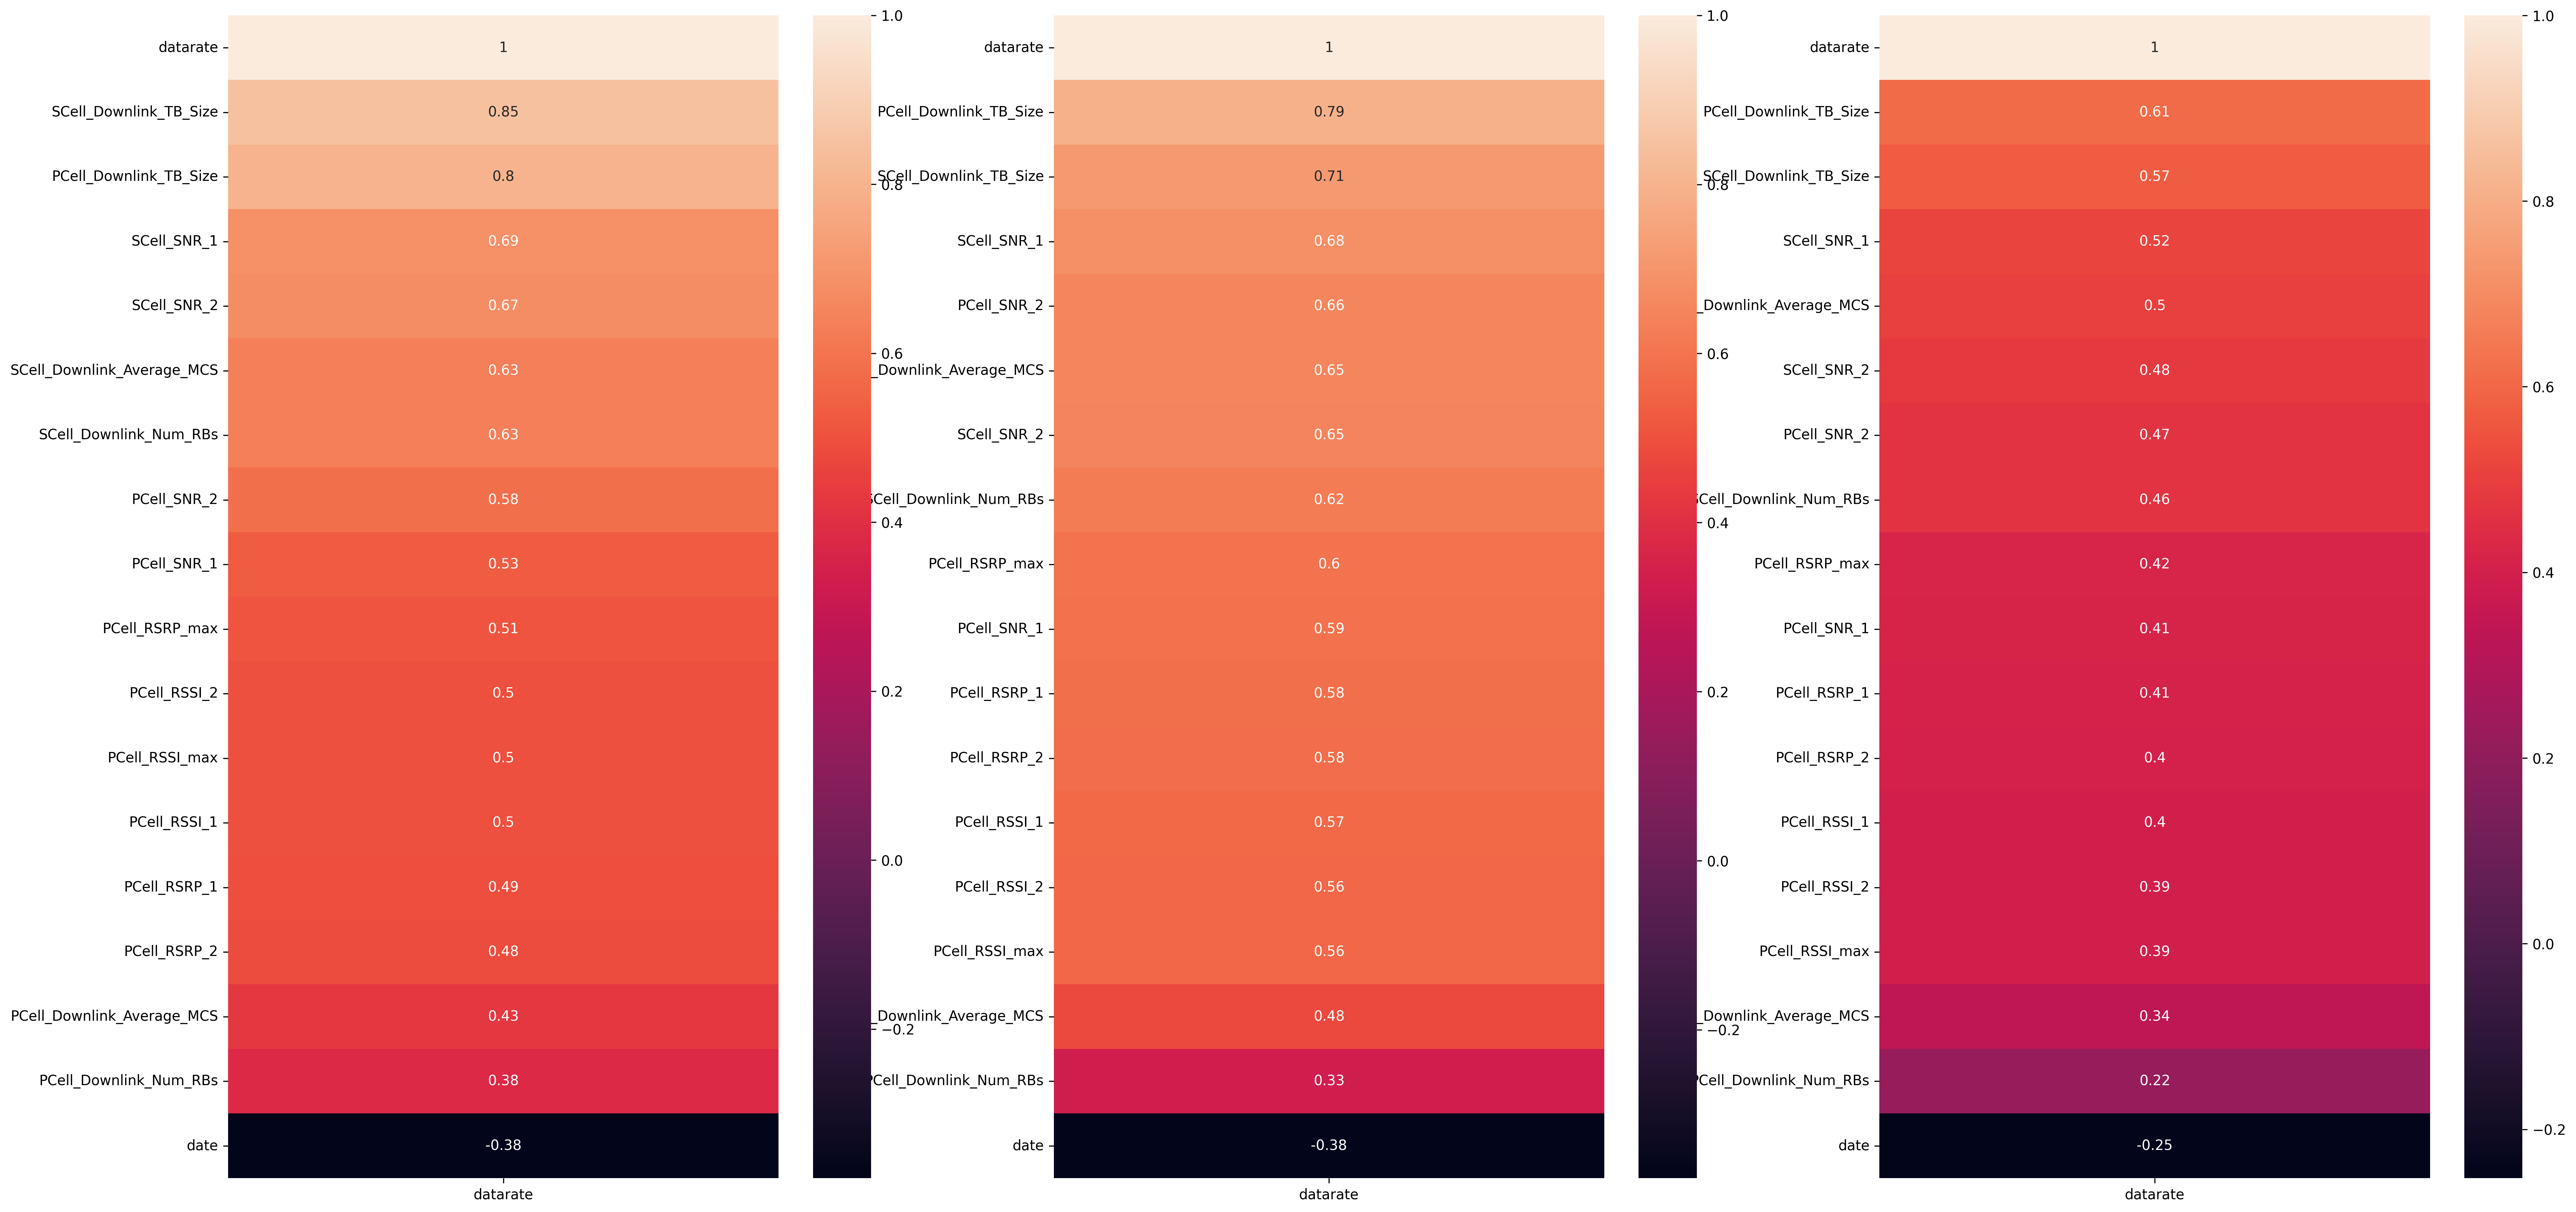

In [28]:
#multi_corr(filtered_data_downlink, 'datarate')
corr1, corr2, corr3 = multi_corr(filtered_data_downlink_selected_old, 'datarate')

In [ ]:
#multi_corr(filtered_data_downlink, 'datarate')
corr1, corr2, corr3 = multi_corr(filtered_data_downlink_selected_new, 'datarate')

In [29]:
corr1['corr1'] = corr1
corr1['corr2'] = corr2
corr1['corr3'] = corr3

df = corr1[['corr1', 'corr2', 'corr3']]
df['average'] = df.mean(axis=1)
df

,corr1,corr2,corr3,average
datarate,1.000000,1.000000,1.000000,1.000000
SCell_Downlink_TB_Size,0.847742,0.713194,0.573318,0.711418
PCell_Downlink_TB_Size,0.797109,0.791373,0.610053,0.732845
SCell_SNR_1,0.685647,0.678052,0.515107,0.626269
SCell_SNR_2,0.674484,0.646673,0.482764,0.601307
SCell_Downlink_Average_MCS,0.634042,0.651000,0.500547,0.595196
SCell_Downlink_Num_RBs,0.629578,0.623857,0.464920,0.572785
PCell_SNR_2,0.581212,0.655686,0.465526,0.567475
PCell_SNR_1,0.528634,0.590892,0.413328,0.510951
PCell_RSRP_max,0.508006,0.596185,0.422238,0.508809


In [ ]:
# not working
#sns.heatmap(df['average'], annot=True)

In [ ]:
corr1, corr2, corr3 = multi_corr(filtered_data_downlink_selected, 'datarate')

In [ ]:
len(filtered_data_downlink_selected_old) * 0.2

10534.6

In [ ]:
scope = 10534
filtered_data_downlink_selected_old.tail(scope)['datarate'].head()

42139    49600000.0
42140    45400000.0
42141    56000000.0
42142    52600000.0
42143    57000000.0
Name: datarate, dtype: float64

In [ ]:
tail = filtered_data_downlink_selected_old.tail(scope)
type(tail)

pandas.core.frame.DataFrame

In [ ]:
tail = tail[['datarate']]
type(tail)

pandas.core.frame.DataFrame

In [ ]:
tail.head()

,datarate
42139,49600000.0
42140,45400000.0
42141,56000000.0
42142,52600000.0
42143,57000000.0


In [ ]:
span = 8
pred_len = 11

truth = []
ewma8 = []
shifted = []

tail['EWMA8'] = tail['datarate'].ewm(span=span, min_periods=8, adjust=True).mean()

b_truth  = tail['datarate'].to_numpy()
b_ewma8 = tail['EWMA8'].to_numpy()

for i in range(len(b_truth) - span - pred_len):
    truth.append(b_truth[(i+span):(i+span+pred_len)])
    ewma8.append(np.repeat(b_ewma8[i+span-1], pred_len)) #correct?
    #ewma8.append(np.repeat(b_ewma8[i+span-0], pred_len)) #informer
    shifted.append(np.repeat(b_truth[i+span-1], pred_len))

#EWMA
rmse = root_mean_squared_error(truth, ewma8)
mae = mean_absolute_error(truth, ewma8)
print(f'EWMA8 rmse: {rmse}, mae: {mae}')

#Shifted
rmse = root_mean_squared_error(truth, shifted)
mae = mean_absolute_error(truth, shifted)
print(f'Shifted rmse: {rmse}, mae: {mae}')

EWMA8 rmse: 12996930.601043763, mae: 8821524.51159211
Shifted rmse: 12980308.67991293, mae: 8755128.431245407
